<a href="https://colab.research.google.com/github/PatrickSFlores/ExerciciosGrowdev/blob/main/Atividade_plot_e_manipula%C3%A7%C3%A3o_dados_Pandas_Semana_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Growdev](https://www.growdev.com.br/assets/images/logo_growdev.png)

![Formação Engenharia de Dados](https://d335luupugsy2.cloudfront.net/cms/files/524558/1707226566/$occu5m8t1op)

Este material tem como objetivo incentivar a prática dos conteúdos estudados até o momento, e a pesquisa. Tenha em consideração que o exercício foi pensado para incentivar a prática dos conteúdos estudados até então, porém aprender a pesquisar faz parte do processo de aprendizagem.

Fique tranquilo, faça os exercícios com calma, e boa prática!


#Orientações:

 - Faça uma copia deste arquivo
 - Após concluir os exercicios, suba seu exercicio para o GitHub e compartilhe o link no **google** Classroom


#Exercícios pandas e plot

As questões a seguir utilizam como base o dataset de venda de jogos eletrônicos disponível no seguinte [link.](https://www.kaggle.com/code/rafa84miranda/vendas-de-jogos-de-videogames/data?select=vgsales.csv)

Os campos são:
- Rank: posição no ranking de vendas
- Name: nome do jogo
- Platform: plataforma/console
- Year: ano de lançamento
- Genre: gênero
- Publisher: empresa que publicou o jogo
- NA_Sales: vendas na américa do norte (em milhões de dólares)
- EU_Sales: vendas na europa (em milhões de dólares)
- JP_Sales: vendas no japão (em milhões de dólares)
- Other_Sales: outras vendas (em milhões de dólares)
- Global_Sales: vendas globais (em milhões de dólares)


In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])

print(df.head())

Qual foi o jogo mais vendido no mundo em 2010?



In [ ]:
df_2010 = df[df['Year'] == 2010]

df_2010_sorted = df_2010.sort_values(by='Global_Sales', ascending=False)

top_game_2010 = df_2010_sorted.iloc[0]

print(f"{top_game_2010['Name']} = {top_game_2010['Global_Sales']} milhões")

Kinect Adventures! = 21.82 milhões


Qual foi a empresa que mais vendeu de 2005 até 2016 - Construa um gráfico de barras para apresentar


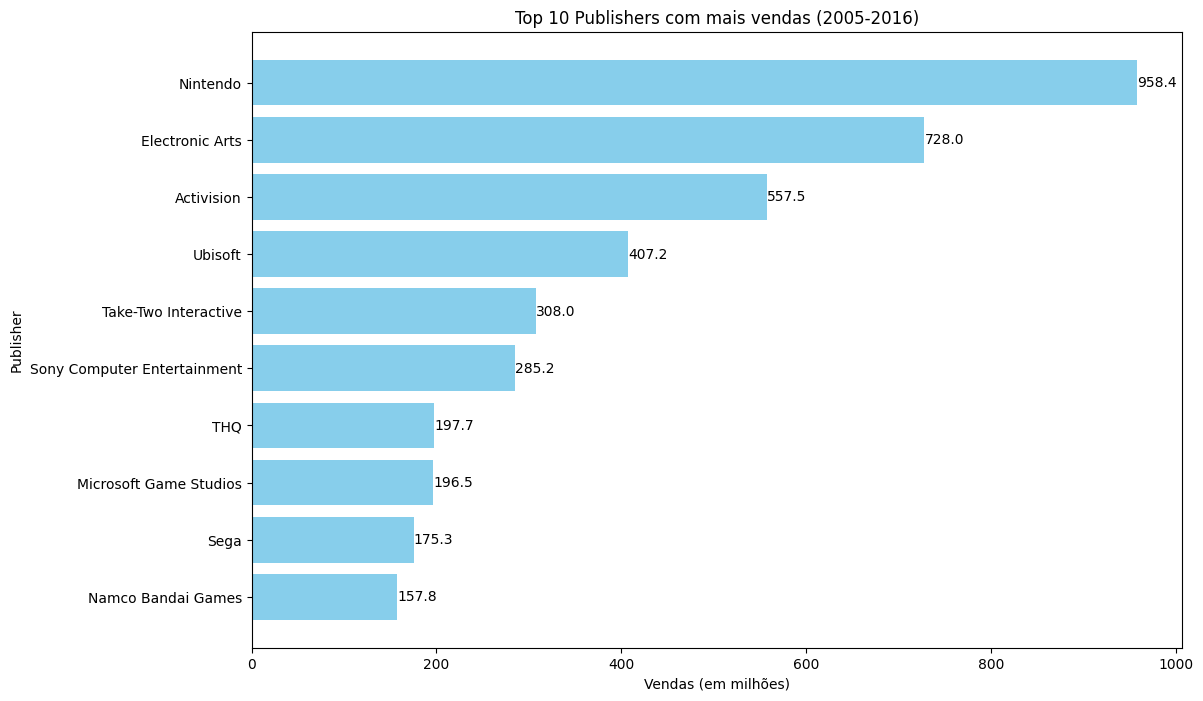

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(list(uploaded.keys())[0])

df_filtered = df[(df['Year'] >= 2005) & (df['Year'] <= 2016)]

sales_by_publisher = df_filtered.groupby('Publisher')['Global_Sales'].sum().reset_index()

top_10_publishers = sales_by_publisher.sort_values(by='Global_Sales', ascending=False).head(10)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_publishers['Publisher'], top_10_publishers['Global_Sales'], color='skyblue')
plt.xlabel('Vendas (em milhões)')
plt.ylabel('Publisher')
plt.title('Top 10 Publishers com mais vendas (2005-2016)')
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.1f}', va='center', ha='left')

plt.show()

Qual o nome do jogo que menos foi vendido em 2008 do gênero Sports.


In [ ]:
from google.colab import files
import pandas as pd

df = pd.read_csv(list(uploaded.keys())[0])

df_2008_sports = df[(df['Year'] == 2008) & (df['Genre'] == 'Sports')]

df_2008_sports_sorted = df_2008_sports.sort_values(by='Global_Sales', ascending=True)

least_sold_game_2008 = df_2008_sports_sorted.iloc[0]

print(f"{least_sold_game_2008['Name']} = {least_sold_game_2008['Global_Sales']} milhões")

Summer Athletics = 0.01 milhões


Qual o percentual relacionado às vendas globais de jogos de Wii (excluindo-se América do norte, japão e europa) de 2006 até 2010?





In [ ]:
from google.colab import files
import pandas as pd

df = pd.read_csv(list(uploaded.keys())[0])

df_wii = df[(df['Platform'] == 'Wii') & (df['Year'] >= 2006) & (df['Year'] <= 2010)]

total_global_sales = df_wii['Global_Sales'].sum()

total_other_sales = df_wii['Other_Sales'].sum()

percent_other_sales = (total_other_sales / total_global_sales) * 100

print(f'O percentual é de {percent_other_sales:.2f}%.')

O percentual é de 8.75%.


Mostre um gráfico de linhas com as vendas em diferentes plataformas ao longo dos anos.


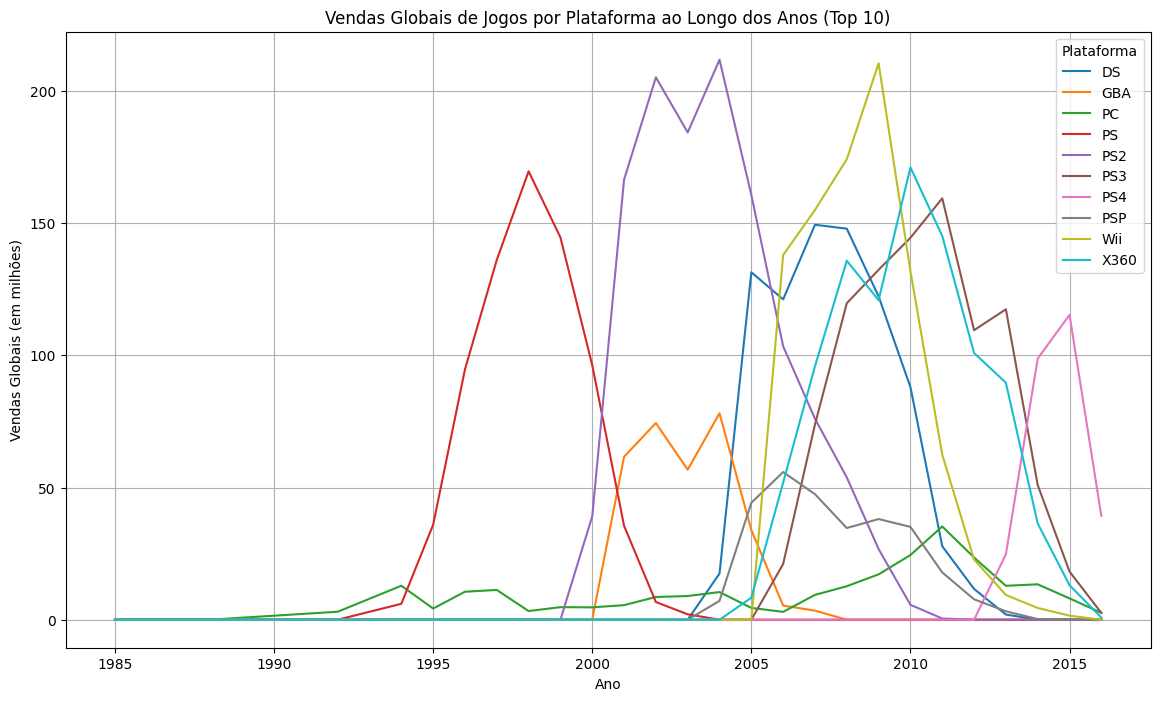

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

df = pd.read_csv(list(uploaded.keys())[0])

total_sales_by_platform = df.groupby('Platform')['Global_Sales'].sum().reset_index()

top_10_platforms = total_sales_by_platform.sort_values(by='Global_Sales', ascending=False).head(10)['Platform']

df_top_10 = df[df['Platform'].isin(top_10_platforms)]

sales_by_year_platform = df_top_10.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

sales_pivot = sales_by_year_platform.pivot(index='Year', columns='Platform', values='Global_Sales').fillna(0)

plt.figure(figsize=(14, 8))
for platform in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[platform], label=platform)

plt.xlabel('Ano')
plt.ylabel('Vendas Globais (em milhões)')
plt.title('Vendas Globais de Jogos por Plataforma ao Longo dos Anos (Top 10)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()

Mostre um gráfico de pizza com o percentual de vendas dos diferentes gêneros de jogos.




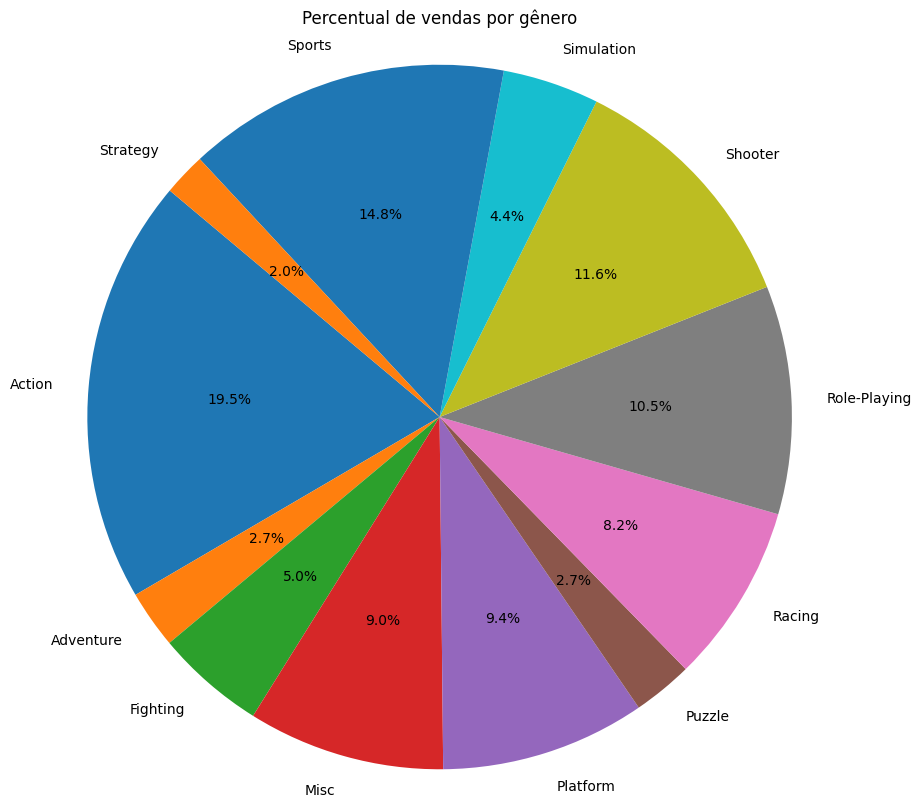

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

total_sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(10, 10))
plt.pie(total_sales_by_genre['Global_Sales'], labels=total_sales_by_genre['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Percentual de vendas por gênero')
plt.axis('equal')
plt.show()

#Exercícios_pandas

Utilize os arquivos [livros.csv](https://drive.google.com/file/d/1fzuUyFxhzhE9U4_-i3IIUTwvgr3QG1Hj/view?usp=sharing), [livros_genero.csv](https://drive.google.com/file/d/1Cww5lAb7l_LQXVhH1ieyIOWIrqorNKcn/view?usp=sharing) e [livros_classicos.csv](https://drive.google.com/file/d/1pbSReiGSIIlHHXbFBOAaA5zTlNTrbY9P/view?usp=sharing) como entrada para o processamento requerido nos seguintes exercícios.


In [4]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()

livros_df = pd.read_csv('livros.csv')
livros_genero_df = pd.read_csv('livros_genero.csv')
livros_classicos_df = pd.read_csv('livros_classicos.csv')

print(livros_df.head())
print(livros_genero_df.head())
print(livros_classicos_df.head())

Saving livros.csv to livros (1).csv


Saving livros_genero.csv to livros_genero.csv


Saving livros_classicos.csv to livros_classicos (1).csv
      nome  paginas
0  livro 1      257
1  livro 2      106
2  livro 3      150
3  livro 4      175
4  livro 5      321
     genero   autor
0     Drama   Pedro
1  Aventura    José
2     Drama  Carlos
3   Romance   Maria
4   Romance   Fabio
      nome    autor
0  livro 1    Jorge
1  livro 2   Santos
2  livro 3  Leandro
3  livro 4    Clara
4  livro 5   Flavia


Faça a concatenação das bases de dados livros.csv e livros_genero.csv e encontre qual o gênero de livro correspondente a cada livro.

In [5]:
import pandas as pd
from google.colab import files

livros_df = pd.read_csv('livros.csv')
livros_genero_df = pd.read_csv('livros_genero.csv')
livros_classicos_df = pd.read_csv('livros_classicos.csv')

genero_lookup_df = livros_genero_df.drop_duplicates()

livros_with_genero = pd.merge(livros_classicos_df, genero_lookup_df, on='autor', how='left')

print(livros_with_genero[['nome', 'genero']])

       nome genero
0   livro 1    NaN
1   livro 2    NaN
2   livro 3    NaN
3   livro 4    NaN
4   livro 5    NaN
5   livro 6    NaN
6   livro 7    NaN
7   livro 8    NaN
8   livro 9    NaN
9  livro 10    NaN


Faça a concatenação das bases de dados de livros e livros_genero e encontre qual os gêneros e os autores que não possuem um livro correspondente.

In [6]:
import pandas as pd
from google.colab import files

livros_df = pd.read_csv('livros.csv')
livros_genero_df = pd.read_csv('livros_genero.csv')
livros_classicos_df = pd.read_csv('livros_classicos.csv')

livros_concat_df = pd.concat([livros_df, livros_classicos_df], ignore_index=True)

genero_lookup_df = livros_genero_df.drop_duplicates()

autores_sem_livro = genero_lookup_df[~genero_lookup_df['autor'].isin(livros_classicos_df['autor'])]

generos_sem_livro = genero_lookup_df[~genero_lookup_df['genero'].isin(livros_concat_df['nome'])]

print("Autores sem Livro Correspondente:")
print(autores_sem_livro)

print("\nGêneros sem Livro Correspondente:")
print(generos_sem_livro)

Autores sem Livro Correspondente:
      genero   autor
0      Drama   Pedro
1   Aventura    José
2      Drama  Carlos
3    Romance   Maria
4    Romance   Fabio
5   Aventura   Aline
6      Drama   Paulo
7   Aventura  Sandro
9   Aventura   Fabio
10   Romance   Pedro

Gêneros sem Livro Correspondente:
      genero   autor
0      Drama   Pedro
1   Aventura    José
2      Drama  Carlos
3    Romance   Maria
4    Romance   Fabio
5   Aventura   Aline
6      Drama   Paulo
7   Aventura  Sandro
9   Aventura   Fabio
10   Romance   Pedro


Faça a junção das bases de livros e livros clássicos.

In [7]:
import pandas as pd

livros_df = pd.read_csv('livros.csv')
livros_classicos_df = pd.read_csv('livros_classicos.csv')

livros_combined_df = pd.merge(livros_df, livros_classicos_df, on='nome', how='outer')

print(livros_combined_df)

       nome  paginas    autor
0   livro 1      257    Jorge
1   livro 2      106   Santos
2   livro 3      150  Leandro
3   livro 4      175    Clara
4   livro 5      321   Flavia
5   livro 6      159  Leandro
6   livro 7      980   Santos
7   livro 8      235   Marcia
8   livro 9      745   Marcia
9  livro 10      126    Clara


Faça a junção das bases de livros e livros clássicos apenas com os elementos em comum entre ambos e remova os índices dos antigos dataframes.

In [8]:
import pandas as pd

livros_df = pd.read_csv('livros.csv')
livros_classicos_df = pd.read_csv('livros_classicos.csv')

livros_combined_df = pd.merge(livros_df, livros_classicos_df, on='nome', how='inner')

livros_combined_df.reset_index(drop=True, inplace=True)

print(livros_combined_df)

       nome  paginas    autor
0   livro 1      257    Jorge
1   livro 2      106   Santos
2   livro 3      150  Leandro
3   livro 4      175    Clara
4   livro 5      321   Flavia
5   livro 6      159  Leandro
6   livro 7      980   Santos
7   livro 8      235   Marcia
8   livro 9      745   Marcia
9  livro 10      126    Clara


Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos.

In [9]:
import pandas as pd

livros_df = pd.read_csv('livros.csv')
livros_classicos_df = pd.read_csv('livros_classicos.csv')

livros_df['chave_livros'] = livros_df.index + 1
livros_classicos_df['chave_classicos'] = livros_classicos_df.index + 1

livros_combined_df = pd.merge(livros_df, livros_classicos_df, on='nome', how='inner')

livros_combined_df.reset_index(drop=True, inplace=True)

print(livros_combined_df)

       nome  paginas  chave_livros    autor  chave_classicos
0   livro 1      257             1    Jorge                1
1   livro 2      106             2   Santos                2
2   livro 3      150             3  Leandro                3
3   livro 4      175             4    Clara                4
4   livro 5      321             5   Flavia                5
5   livro 6      159             6  Leandro                6
6   livro 7      980             7   Santos                7
7   livro 8      235             8   Marcia                8
8   livro 9      745             9   Marcia                9
9  livro 10      126            10    Clara               10


Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos, além de nomes para os índices.

In [10]:
import pandas as pd

livros_df = pd.read_csv('livros.csv')
livros_classicos_df = pd.read_csv('livros_classicos.csv')

livros_df['chave_livros'] = livros_df.index + 1
livros_classicos_df['chave_classicos'] = livros_classicos_df.index + 1

livros_combined_df = pd.merge(livros_df, livros_classicos_df, on='nome', how='inner')

livros_combined_df.reset_index(drop=True, inplace=True)
livros_combined_df.index.name = 'indice'

print(livros_combined_df)

            nome  paginas  chave_livros    autor  chave_classicos
indice                                                           
0        livro 1      257             1    Jorge                1
1        livro 2      106             2   Santos                2
2        livro 3      150             3  Leandro                3
3        livro 4      175             4    Clara                4
4        livro 5      321             5   Flavia                5
5        livro 6      159             6  Leandro                6
6        livro 7      980             7   Santos                7
7        livro 8      235             8   Marcia                8
8        livro 9      745             9   Marcia                9
9       livro 10      126            10    Clara               10


Faça a junção das bases de dados livros e livros_classicos e verifique a integridade do dataframe resultante.

In [11]:
import pandas as pd

livros_df = pd.read_csv('livros.csv')
livros_classicos_df = pd.read_csv('livros_classicos.csv')

livros_df['chave_livros'] = livros_df.index + 1
livros_classicos_df['chave_classicos'] = livros_classicos_df.index + 1

livros_combined_df = pd.merge(livros_df, livros_classicos_df, on='nome', how='inner')

livros_combined_df.reset_index(drop=True, inplace=True)
livros_combined_df.index.name = 'indice'

integridade_df = {
    "Total de Registros": len(livros_combined_df),
    "Colunas": livros_combined_df.columns.tolist(),
    "Valores Nulos": livros_combined_df.isnull().sum().to_dict()}

print("DataFrame Combinado:")
print(livros_combined_df)
print("\nIntegridade do DataFrame:")
print(integridade_df)

DataFrame Combinado:
            nome  paginas  chave_livros    autor  chave_classicos
indice                                                           
0        livro 1      257             1    Jorge                1
1        livro 2      106             2   Santos                2
2        livro 3      150             3  Leandro                3
3        livro 4      175             4    Clara                4
4        livro 5      321             5   Flavia                5
5        livro 6      159             6  Leandro                6
6        livro 7      980             7   Santos                7
7        livro 8      235             8   Marcia                8
8        livro 9      745             9   Marcia                9
9       livro 10      126            10    Clara               10

Integridade do DataFrame:
{'Total de Registros': 10, 'Colunas': ['nome', 'paginas', 'chave_livros', 'autor', 'chave_classicos'], 'Valores Nulos': {'nome': 0, 'paginas': 0, 'chave_livros'